# CelMo example.

In [4]:
from celmo import *
from celmo.interface.notebook import * 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline

# Data and project directory 

The function `read_enzo_data` returns a cel_data container. The arguments of the function are:

1. `project_path` : A directory containing ENZO uni-grid data for CE simulations (Passy J. C. et al. 2012, ApJ, 744, 52). 
2. `data_path` : A path for CelMo data.
3. `yt_reader` : Activate/deactivate the use of yt to read the data. `yt_reader=False` uses a build-in procedure to read the data files.

In [5]:
data_directory=os.path.expanduser("~/data/enzo/data/DD0000/data0000")
project_directory=os.path.expanduser("~/data/celmo")

celmo_data = read_enzo_data(project_path=project_directory,data_path=data_directory,yt_reader=False)

CELMO WARNING [2016-11-23 10:00:31,313] | No field Total_Energy found, trying TotalEnergy.
CELMO INFO [2016-11-23 10:00:31,552] | Found TotalEnergy field.


## Temperature
`compute_temperature` requieres:
1. Teff     : Effective temperature of the initial model 
2. mu       : The mean molecular weight, $T=\frac{U M(\gamma-1)}{N_a k}$ where $M=1.00797/\mu$
3. rho0     : A floor density 
4. cel_data : CelMo data container with fields `energy density` $U$ and `density` $rho$

**Note: `density` is required to define the "vacuum region" $\rho < \rho_0$ **

In [6]:
compute_temperature( Teff=3500, mu=1.2, rho0=1e-9, cel_data=celmo_data)

CELMO INFO [2016-11-23 10:00:36,449] | Found temperature.


In [7]:

compute_opacity(celmo_data)

compute_filters(celmo_data)

compute_attenuation(celmo_data)

compute_optical_depth(celmo_data)

compute_brightness(celmo_data)

compute_extinction_factor(celmo_data)

compute_energy_flux_density(celmo_data)

compute_luminosity(celmo_data,project_directory)

CELMO INFO [2016-11-23 10:00:36,458] | Found opacity field.
CELMO INFO [2016-11-23 10:00:36,459] | Found filters
CELMO INFO [2016-11-23 10:00:36,460] | Found attenuation field.
CELMO INFO [2016-11-23 10:00:36,461] | Found optical depth.
CELMO INFO [2016-11-23 10:00:36,462] | Found differential brightness field.
CELMO INFO [2016-11-23 10:00:36,463] | Found extinction factor
CELMO INFO [2016-11-23 10:00:36,465] | Found energy flux density field.
CELMO INFO [2016-11-23 10:00:38,380] | 	Bolometric Luminosity -X: 3.567318e+36 -- 929.231150
CELMO INFO [2016-11-23 10:00:38,381] | 	Bolometric Luminosity +X: 3.567318e+36 -- 929.231150
CELMO INFO [2016-11-23 10:00:38,382] | 	Bolometric Luminosity -Y: 3.567318e+36 -- 929.231150
CELMO INFO [2016-11-23 10:00:38,383] | 	Bolometric Luminosity +Y: 3.567318e+36 -- 929.231150
CELMO INFO [2016-11-23 10:00:38,383] | 	Bolometric Luminosity -Z: 3.567318e+36 -- 929.231150
CELMO INFO [2016-11-23 10:00:38,384] | 	Bolometric Luminosity +Z: 3.567318e+36 -- 929.2

`list_fields` and `list_parameters` shows the data contained in `celmo_data`

In [8]:
celmo_fields=celmo_data.list_fields()
#for the next example we don't need these fields 
celmo_fields.remove('x')
celmo_fields.remove('y')
celmo_fields.remove('z')
celmo_fields.remove('dx')
celmo_fields.remove('dy')
celmo_fields.remove('dz')
#position array 
celmo_fields.remove('particle_position_x')
celmo_fields.remove('particle_position_y')
celmo_fields.remove('particle_position_z')

#2D fields 
celmo_fields.remove('EFD_B_mX')
celmo_fields.remove('EFD_B_PX')
celmo_fields.remove('EFD_B_mY')
celmo_fields.remove('EFD_B_PY')
celmo_fields.remove('EFD_B_mZ')
celmo_fields.remove('EFD_B_PZ')

celmo_fields.remove('EFD_V_mX')
celmo_fields.remove('EFD_V_PX')
celmo_fields.remove('EFD_V_mY')
celmo_fields.remove('EFD_V_PY')
celmo_fields.remove('EFD_V_mZ')
celmo_fields.remove('EFD_V_PZ')

celmo_fields.remove('EFD_I_mX')
celmo_fields.remove('EFD_I_PX')
celmo_fields.remove('EFD_I_mY')
celmo_fields.remove('EFD_I_PY')
celmo_fields.remove('EFD_I_mZ')
celmo_fields.remove('EFD_I_PZ')

## Plot 1d cuts of the fields

`get_field_1d` returs a 1d numpy array with the data at half domain 

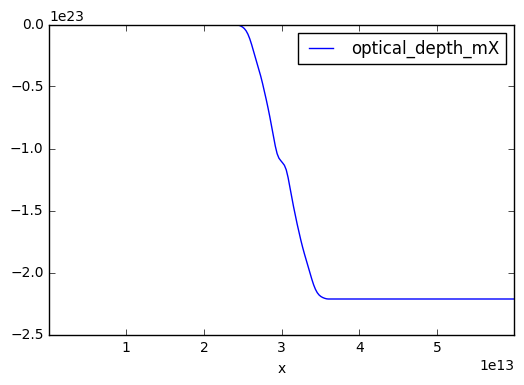

In [9]:
def show_field(field=celmo_fields,axis=['x','y','z'],plot=False,logscale=False):
    axis_map={'x':0,'y':1,'z':2}
    temperature = celmo_data.get_field_1d(field,axis=axis_map[axis])
    coordinate=celmo_data.get_field_1d(axis,axis=axis_map[axis])
    df = pd.DataFrame({axis:coordinate,field:temperature})
    if plot:
        df.set_index(axis).plot(logy=logscale)
    else:
        print(df) 
d=interact_manual(show_field)

## Plot 2d  fields

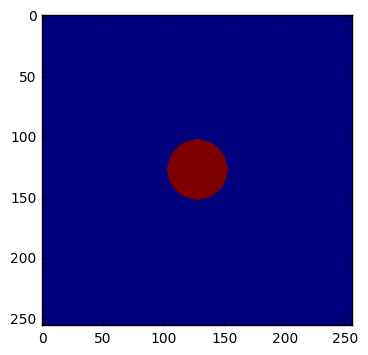

In [10]:
efd=celmo_data.get_field('EFD_B_mX')

plt.imshow(np.log(efd+1))

plt.show()

# Celmo

Common envelope light module. 

## Synopsis

Celmo  computes   the  light   curve  emitted  from   common  envelope
hydrodynamic  simulations carried  out with  the 3D  hydrodynamic code
Enzo used in unigrid mode.


## Installation

To install celmo in your standar python directorie run the command:

`sudo pip install /path/to/celmo/source`

## Examples 

### command line 

Assuming that the data is in `/path/to/data`

1. Create a new project directory `mkdir /path/to/root/project`
2. Create a new parameter file some_params.par (see below)
3. Run celmo `nohup celmo_cmd.py some_params.par > output.log &`


### interactive notebook 

Follow the example in celmo/notebooks/Example.ipynb

### parameter file 

The parameter file has the following format:

>[output]

>directory=/path/to/root/project

>datafiles=/path/to/data

>overwrite=no

>[model]

>effective_temperature=3500

>mol_weight=1.2

>floor_density=1e-9
